# Dataset extraction and importing Necessory libraries

In [62]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()
os.chdir('/home/sdr/Pictures/The scholar/ML/Assignment-2/train/')
main_set=pd.read_csv('aug_train.csv')
data=main_set.iloc[:,1:14]
main_set.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Missing Value Detection

In [2]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Missing Value Treatment

In [3]:
data['gender']=data['gender'].fillna('Male')
data['enrolled_university']=data['enrolled_university'].fillna('no_enrollment')
data['education_level']=data['education_level'].fillna('Graduate')
data['major_discipline']=data['major_discipline'].fillna('STEM')
data['experience']=data['experience'].fillna('>20')
data['company_size']=data['company_size'].fillna('50-99')
data['company_type']=data['company_type'].fillna('Pvt Ltd')
data['last_new_job']=data['last_new_job'].fillna('1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


# Encoding Techniques

In [5]:
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes
data['relevent_experience'] = data['relevent_experience'].astype('category')
data['relevent_experience'] = data['relevent_experience'].cat.codes
data['enrolled_university'] = data['enrolled_university'].astype('category')
data['enrolled_university'] = data['enrolled_university'].cat.codes
data['education_level'] = data['education_level'].astype('category')
data['education_level'] = data ['education_level'].cat.codes
data['major_discipline']=data['major_discipline'].astype('category')
data['major_discipline']=data['major_discipline'].cat.codes
data['experience']=data['experience'].replace(['>20','<1'],['21','0'])
data['experience']=pd.to_numeric(data['experience'])
data['company_size']=data['company_size'].replace(['50-99','<10','10000+','5000-9999','1000-4999','10/49','100-500','500-999'],['75','6','10001','7500','3000','30','300','750'])
data['company_size']=pd.to_numeric(data['company_size'])
data['last_new_job']=data['last_new_job'].replace(['>4','never'],['5','0'])
data['last_new_job']=pd.to_numeric(data['last_new_job'])
data=pd.get_dummies(data,columns=['company_type'],drop_first=True)
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,city_103,0.920,1,0,2,0,5,21,75,1,36,1.0,0,0,0,0,1
1,city_40,0.776,1,1,2,0,5,15,75,5,47,0.0,0,0,0,0,1
2,city_21,0.624,1,1,0,0,5,5,75,0,83,0.0,0,0,0,0,1
3,city_115,0.789,1,1,2,0,1,0,75,0,52,1.0,0,0,0,0,1
4,city_162,0.767,1,0,2,2,5,21,75,4,8,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,1,1,2,0,2,14,75,1,42,1.0,0,0,0,0,1
19154,city_103,0.920,1,0,2,0,5,14,75,4,52,1.0,0,0,0,0,1
19155,city_103,0.920,1,0,2,0,5,21,75,4,44,0.0,0,0,0,0,1
19156,city_65,0.802,1,0,2,1,5,0,750,2,97,0.0,0,0,0,0,1


In [6]:
#probablity ratio encoding for city column
main_mean_1=main_set.groupby(data['city'])['target'].mean()
main_mean_0=1-main_mean_1
main_mean_0
pr=main_mean_1/main_mean_0
pr=pr.to_dict()
data['city']=data['city'].map(pr)
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.270791,0.920,1,0,2,0,5,21,75,1,36,1.0,0,0,0,0,1
1,0.172414,0.776,1,1,2,0,5,15,75,5,47,0.0,0,0,0,0,1
2,1.445249,0.624,1,1,0,0,5,5,75,0,83,0.0,0,0,0,0,1
3,0.636364,0.789,1,1,2,0,1,0,75,0,52,1.0,0,0,0,0,1
4,0.406593,0.767,1,0,2,2,5,21,75,4,8,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.143939,0.878,1,1,2,0,2,14,75,1,42,1.0,0,0,0,0,1
19154,0.270791,0.920,1,0,2,0,5,14,75,4,52,1.0,0,0,0,0,1
19155,0.270791,0.920,1,0,2,0,5,21,75,4,44,0.0,0,0,0,0,1
19156,0.158940,0.802,1,0,2,1,5,0,750,2,97,0.0,0,0,0,0,1


In [7]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data=data.dropna(axis=0)
data['city'].unique()
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.270791,0.920,1,0,2,0,5,21,75,1,36,1.0,0,0,0,0,1
1,0.172414,0.776,1,1,2,0,5,15,75,5,47,0.0,0,0,0,0,1
2,1.445249,0.624,1,1,0,0,5,5,75,0,83,0.0,0,0,0,0,1
3,0.636364,0.789,1,1,2,0,1,0,75,0,52,1.0,0,0,0,0,1
4,0.406593,0.767,1,0,2,2,5,21,75,4,8,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.143939,0.878,1,1,2,0,2,14,75,1,42,1.0,0,0,0,0,1
19154,0.270791,0.920,1,0,2,0,5,14,75,4,52,1.0,0,0,0,0,1
19155,0.270791,0.920,1,0,2,0,5,21,75,4,44,0.0,0,0,0,0,1
19156,0.158940,0.802,1,0,2,1,5,0,750,2,97,0.0,0,0,0,0,1


# Correlation detections

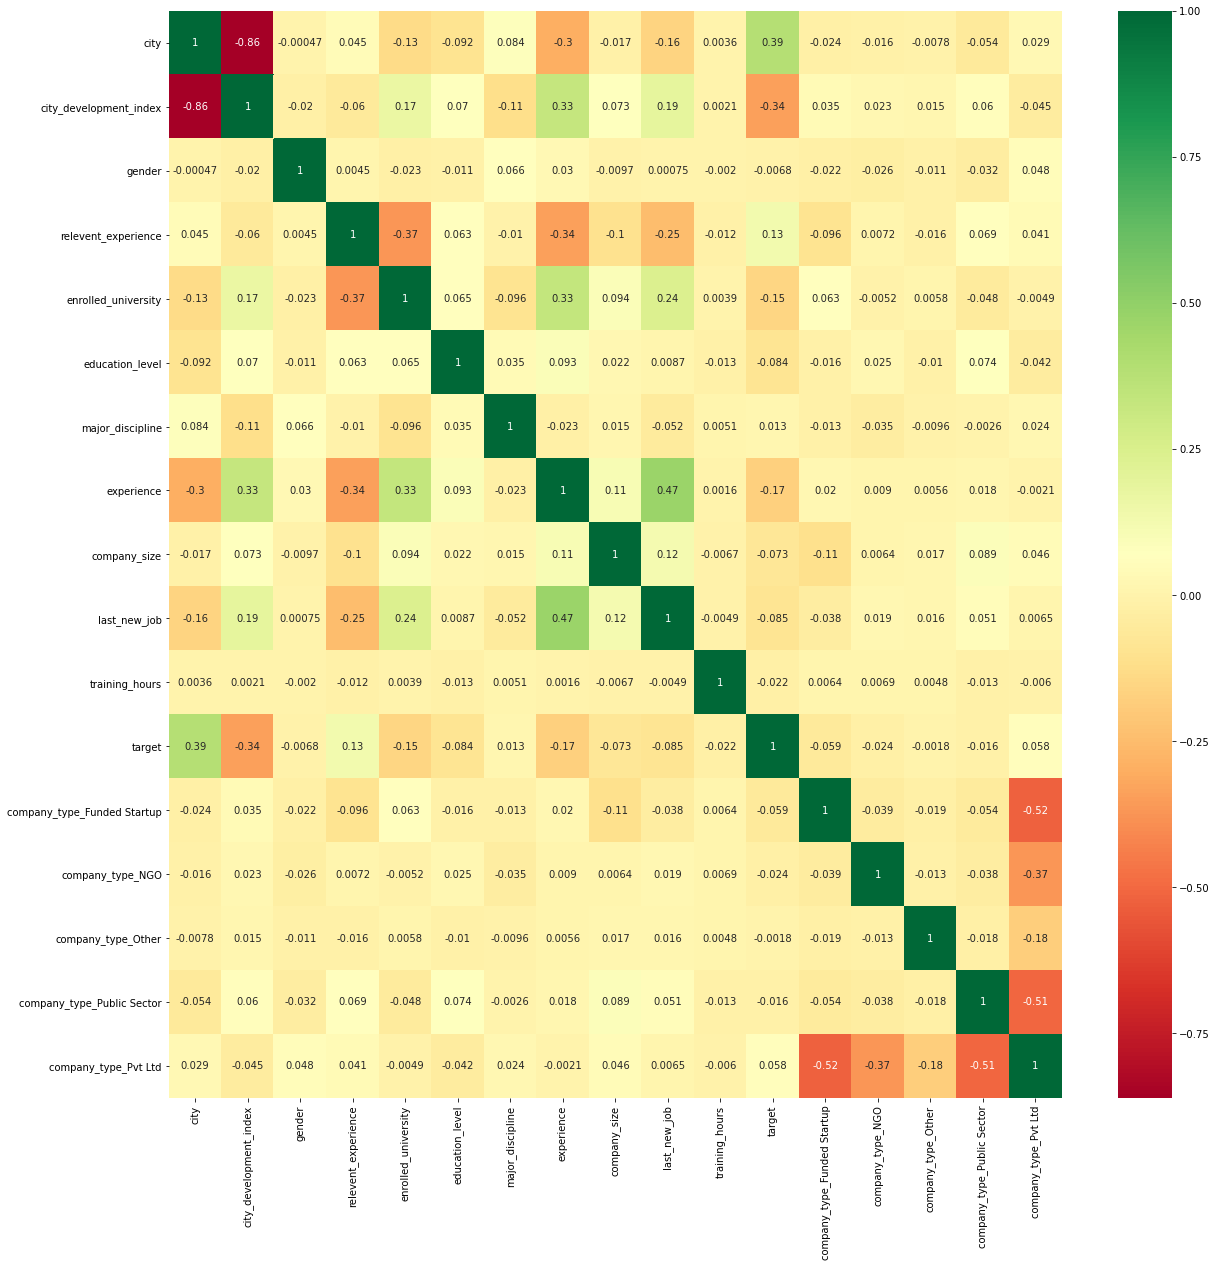

In [8]:
corrmat=data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# splitting Predictor & Response and Feature Engineering to Predictor 

In [9]:
y=data['target']
x=data[['city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','last_new_job','training_hours','company_type_Funded Startup','company_type_NGO','company_type_Other','company_type_Public Sector','company_type_Pvt Ltd']]
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x=ssc.fit_transform(x)
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19157, dtype: float64

# Importing Test Dataset

In [10]:
os.chdir('/home/sdr/Pictures/The scholar/ML/Assignment-2/test/Aug-test/')
test=pd.read_csv('aug_test.csv')
test=test.iloc[:,1:13]
test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


# Missing Value Detection

In [11]:
test.isna().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

# Missing value Treatment

In [12]:
test['gender']=test['gender'].fillna('Male')
test['enrolled_university']=test['enrolled_university'].fillna('no_enrollment')
test['education_level']=test['education_level'].fillna('Graduate')
test['major_discipline']=test['major_discipline'].fillna('STEM')
test['experience']=test['experience'].fillna('>20')
test['company_size']=test['company_size'].fillna('50-99')
test['company_type']=test['company_type'].fillna('Pvt Ltd')
test['last_new_job']=test['last_new_job'].fillna('1')

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  2129 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2129 non-null   object 
 5   education_level         2129 non-null   object 
 6   major_discipline        2129 non-null   object 
 7   experience              2129 non-null   object 
 8   company_size            2129 non-null   object 
 9   company_type            2129 non-null   object 
 10  last_new_job            2129 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 199.7+ KB


# Encoding Techniques

In [14]:
test['gender'] = test['gender'].astype('category')
test['gender'] = test['gender'].cat.codes
test['relevent_experience'] = test['relevent_experience'].astype('category')
test['relevent_experience'] = test['relevent_experience'].cat.codes
test['enrolled_university'] = test['enrolled_university'].astype('category')
test['enrolled_university'] = test['enrolled_university'].cat.codes
test['education_level'] = test['education_level'].astype('category')
test['education_level'] = test ['education_level'].cat.codes
test['major_discipline']=test['major_discipline'].astype('category')
test['major_discipline']=test['major_discipline'].cat.codes
test['experience']=test['experience'].replace(['>20','<1'],['21','0'])
test['experience']=pd.to_numeric(test['experience'])
test['company_size']=test['company_size'].replace(['50-99','<10','10000+','5000-9999','1000-4999','10/49','100-500','500-999'],['75','6','10001','7500','3000','30','300','750'])
test['company_size']=pd.to_numeric(test['company_size'])
test['last_new_job']=test['last_new_job'].replace(['>4','never'],['5','0'])
test['last_new_job']=pd.to_numeric(test['last_new_job'])
test=pd.get_dummies(test,columns=['company_type'],drop_first=True)
test['city']=test['city'].map(pr)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test=test.dropna(axis=0)
test=test.values

# Building Logistic Classifier Model

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x,y)
general_Y=model.predict(x)
accuracy_score(y,general_Y)

/home/sdr/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7769483739625203

# Hyper Parameter Optimisization

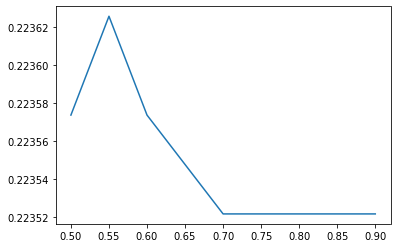

In [16]:
from sklearn.model_selection import cross_val_score
C =[0.5,0.55,0.6,0.7,0.8,0.9]
cv_scores=[]
for i in C:
    a= LogisticRegression(C=i)
    scores = cross_val_score(a,x,y,cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
c = C[MSE.index(min(MSE))]
c
plt.plot(C,MSE)

In [17]:
c

0.7

# L2 regularization

In [18]:
l2 = LogisticRegression(penalty='l2',C=c,tol=0.01,max_iter=1000,random_state=0)
l2.fit(x,y)

LogisticRegression(C=0.7, max_iter=1000, random_state=0, tol=0.01)

In [19]:
print(l2.coef_)
print(l2.intercept_)

[[ 0.7987527   0.00728798 -0.02834252  0.20876178 -0.14556783 -0.15806716
  -0.06083437 -0.04913169 -0.18083463  0.06420865 -0.06240854 -0.04921965
   0.01682601  0.04291152  0.11153899  0.18162705]]
[-1.27328174]


# L1 regularization

In [20]:
l1 = LogisticRegression(penalty='l1',C=c,tol=0.01,max_iter=50,random_state=0,solver='liblinear')
l1.fit(x,y)

LogisticRegression(C=0.7, max_iter=50, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.01)

In [21]:
print(l1.coef_)
print(l1.intercept_)

[[ 7.92001005e-01  7.16463264e-05 -2.79869996e-02  2.08654148e-01
  -1.45033046e-01 -1.57663760e-01 -6.07310655e-02 -4.83807267e-02
  -1.79542509e-01  6.34826730e-02 -6.18877009e-02 -5.08533547e-02
   1.45113223e-02  4.15907768e-02  1.08665438e-01  1.77454484e-01]]
[-1.27218224]


# Optimization Using Randomized Search

In [22]:
best_fit=LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV
parameter={
"C":[3,2,1,0.7,0.8,0.5,0.6,0.4,0.3,0.2],
"penalty":['l1','l2'],
"max_iter":[10,100,1000,10000],
"random_state":[0,3,5,10,15],
"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}
random_search=RandomizedSearchCV(best_fit,param_distributions=parameter,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [23]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [3, 2, 1, 0.7, 0.8, 0.5, 0.6, 0.4,
                                              0.3, 0.2],
                                        'max_iter': [10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [0, 3, 5, 10, 15],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [24]:
random_search.best_estimator_

LogisticRegression(C=0.6, max_iter=10000, penalty='l1', random_state=5,
                   solver='saga')

# Best Combination Model Building

In [25]:
lr=LogisticRegression(C=0.4, max_iter=10000, penalty='l1', random_state=3,
                   solver='saga')
best_model=lr.fit(x,y)

# Trained Model Accuracy Checking

In [26]:
x_test=ssc.fit_transform(test)
y_train_predict=model.predict(x)
y_train_predict_l1=l1.predict(x)
y_train_predict_best=best_model.predict(x)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('l2: ',accuracy_score(y,y_train_predict))
print('l1: ',accuracy_score(y,y_train_predict_l1))
print('Best Combination: ',accuracy_score(y,y_train_predict_best))

l2:  0.7769483739625203
l1:  0.7770005742026413
Best Combination:  0.7769483739625203


In [28]:
print(confusion_matrix(y,y_train_predict))
print('\n')
print(confusion_matrix(y,y_train_predict_l1))
print('\n')
print(confusion_matrix(y,y_train_predict_best))

[[13262  1119]
 [ 3154  1622]]


[[13261  1120]
 [ 3152  1624]]


[[13259  1122]
 [ 3151  1625]]


# Target Prediction  in Test Data Using Randomsearch Optimization

In [29]:
print('Target Prediction using best combinaion')
y_Test_prediction=best_model.predict(x_test)
pd.DataFrame(y_Test_prediction)

Target Prediction using best combinaion


,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2123,0.0
2124,0.0
2125,0.0
2126,0.0


In [30]:
print('Target Prediction using L1 Regularisation')
y_Test_prediction_l1=best_model.predict(x_test)
pd.DataFrame(y_Test_prediction_l1)

Target Prediction using L1 Regularisation


,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2123,0.0
2124,0.0
2125,0.0
2126,0.0


In [31]:
print('Target Prediction using L2 Regularisation')
y_Test_prediction_l2=best_model.predict(x_test)
pd.DataFrame(y_Test_prediction_l2)

Target Prediction using L2 Regularisation


,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2123,0.0
2124,0.0
2125,0.0
2126,0.0


# Support Vector Classifier Model Building

In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x,y)

SVC()

In [33]:
svc

SVC()

In [34]:
y_svc=svc.predict(x)
accuracy_score(y,y_svc)

0.7857702145429869

# Hyperparameter Optimization

In [35]:
from sklearn.model_selection import GridSearchCV
param={
"C":[1,2,3,4,5,6,0.5,0.6,0.7,0.8,0.9],
"kernel":["linear","poly","rbf","sigmoid"],
"gamma":["scale","auto"],
"decision_function_shape":["ovr","ovo"]
}
gscv=GridSearchCV(estimator=svc,
    param_grid=param,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [36]:
#gscv.fit(x,y)

In [37]:
#gscv.best_params_

In [38]:
svc_best=SVC(C=1,decision_function_shape='ovr',
 gamma='scale',
 kernel='linear')
svc_best.fit(x,y)

SVC(C=1, kernel='linear')

In [39]:
y_train_predict_svc=svc_best.predict(x)
accuracy_score(y,y_train_predict_svc)

0.7823771989351151

In [40]:
y_pre_svc=svc_best.predict(x_test)
pd.DataFrame(y_pre_svc)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2123,0.0
2124,0.0
2125,0.0
2126,0.0


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier()

# Model With Default Parameter accuracy Check

In [42]:
y_train_predict_dtc=dtc.predict(x)
accuracy_score(y,y_train_predict_dtc)

0.9972855875137026

# HyperParameter Optimization Using GridSearch

In [43]:
Para={
    "splitter":["best", "random"],
    "criterion":["gini", "entropy"],
    "max_depth":[int(x) for x in np.linspace(10, 1000,10)],
    "min_samples_split":[2, 5, 10,14],
    "min_samples_leaf" :[1, 2, 4,6,8]
    
}
gs=GridSearchCV(cv=5,estimator=dtc,n_jobs=-1,param_grid=Para,verbose=1)
gs.fit(x,y)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3993 out of 4000 | elapsed:  1.6min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 120, 230, 340, 450, 560, 670, 780,
                                       890, 1000],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       min_samples_split=14, splitter='random')

# Rebuilding the Model With Best Parameter

In [45]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=14, splitter='random')
dtc_best.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=14, splitter='random')

# Accuracy of the Optimized Model Checking

In [46]:
y_train_predict_dtc_best=dtc_best.predict(x)
accuracy_score(y,y_train_predict_dtc_best)

0.7926084459988516

# Decision Tree Plotting For Train Set

In [47]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz

In [48]:
target_name=["Negative (0)","Positive (1)"]
x=data[['city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','last_new_job','training_hours','company_type_Funded Startup','company_type_NGO','company_type_Other','company_type_Public Sector','company_type_Pvt Ltd']]

In [54]:
feature_names=x.columns

In [56]:
dot_data=tree.export_graphviz(dtc_best,feature_names=feature_names,class_names=target_name,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_jpg())

InvocationException: GraphViz's executables not found

# Target Predicting in the Test Data

In [66]:
y__train_pre_DT=dtc_best.predict(x_test)
pd.DataFrame(y__train_pre_DT)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2123,0.0
2124,0.0
2125,0.0
2126,0.0
